## Cost Functions
Let's test following cost function: 
$ f(x) = x^2 + x - 1 $

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def f(x):
    return x ** 2 + x - 1

In [3]:
# Prepare data 
dataset = np.linspace(start=-5, stop=5, num=70)

## Derivative of f(x)
$f'(x) = 2x + 1$

In [4]:
def df_dx(x):
    return 2 * x + 1

## Subplot functionality

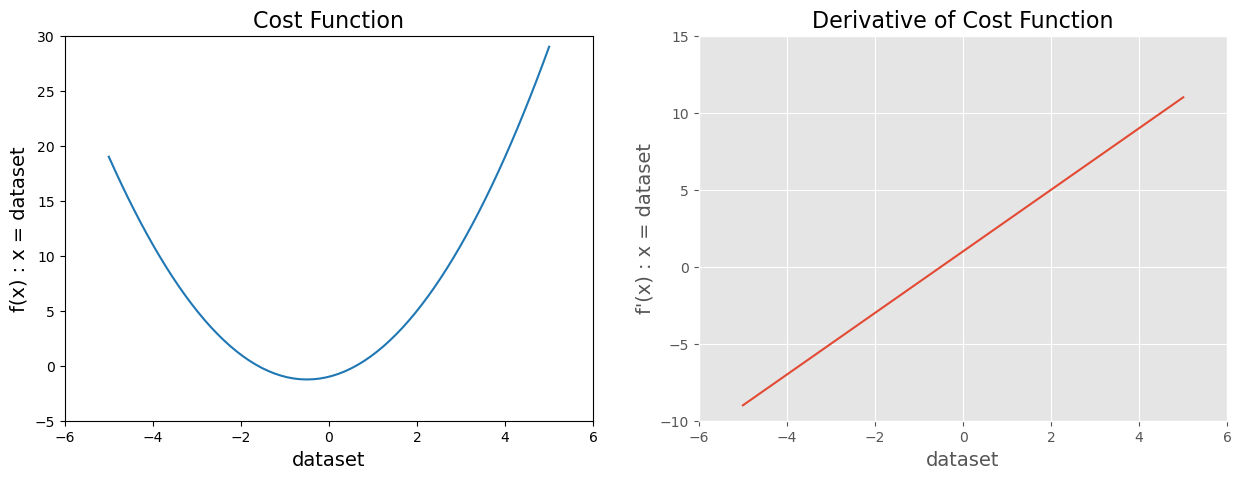

In [5]:
plt.figure(figsize=[15, 5])
# Subplot functionality: indexed at 1 (rows, columns, index)
plt.subplot(1, 2, 1)

# Graph 1: Cost Function
plt.title('Cost Function', fontsize=16)
plt.xlabel('dataset', fontsize=14)
plt.ylabel('f(x) : x = dataset', fontsize=14)
plt.style.use('ggplot')

plt.plot(dataset, f(dataset))
plt.xlim([-6, 6])
plt.ylim([-5, 30])

# Graph 2: Derivative of cost Function
plt.subplot(1, 2, 2)
plt.title('Derivative of Cost Function', fontsize=16)
plt.xlabel('dataset', fontsize=14)
plt.ylabel('f\'(x) : x = dataset', fontsize=14)
plt.style.use('ggplot')

plt.plot(dataset, df_dx(dataset))
plt.xlim([-6, 6])
plt.ylim([-10, 15])

plt.show()

## Gradient Descent Algorithm
On each step: $new_x = prev_x - step * slope$ <br>
where, 
1. prev_x is set to any arbitrary value initially
2. new_x is assigned to prev value at next iteration
3. step is like standard jump to take when slope is 1

In [6]:
# Gradient Descent Algorithm: Prediction of minimum value
new_x = 3
step = 0.1
precision = 0.00001

# Collect data of new_x and gradients
xs = [new_x]
slopes = [df_dx(new_x)]

while df_dx(new_x) > precision:
    prev_x = new_x
    new_x = prev_x - step * df_dx(new_x)

    # Keep track of data
    xs.append(new_x)
    slopes.append(df_dx(new_x))

print(new_x)

-0.4999957090124856


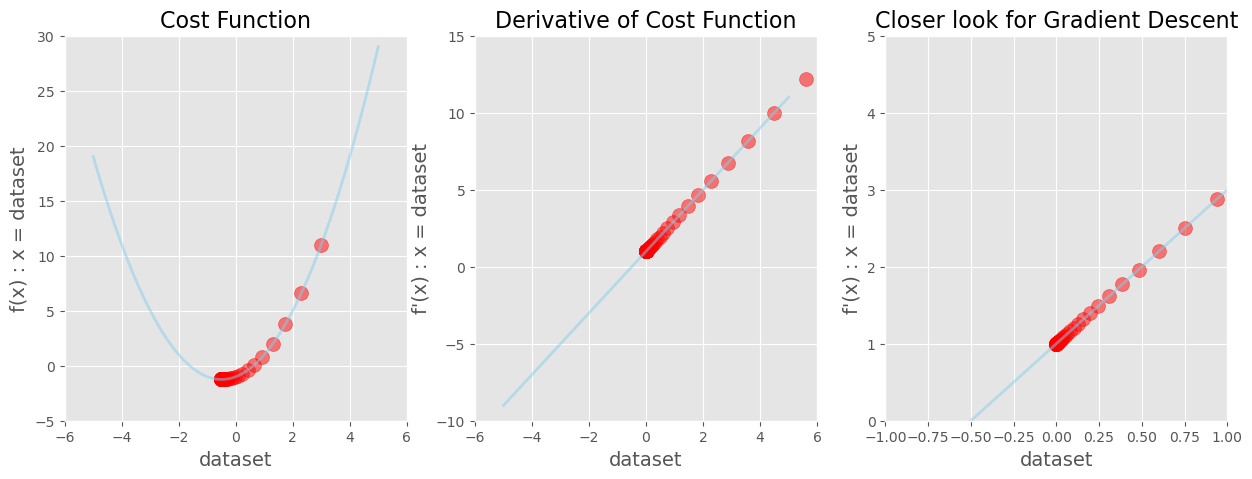

In [7]:
plt.figure(figsize=[15, 5])
# Subplot functionality: idexed at 1 (rows, columns, index)
plt.subplot(1, 3, 1)

# Graph 1: Cost Function
plt.title('Cost Function', fontsize=16)
plt.xlabel('dataset', fontsize=14)
plt.ylabel('f(x) : x = dataset', fontsize=14)
plt.style.use('ggplot')

plt.plot(dataset, f(dataset), alpha=0.5, color='skyblue', linewidth=2)
plt.xlim([-6, 6])
plt.ylim([-5, 30])

# Plot scatter plot for predicate and updated values: array conversion is required
values = np.array(xs)
plt.scatter(xs, f(values), s=100, color='red', alpha=0.5)

# Graph 2: Derivative of cost Function
plt.subplot(1, 3, 2)
plt.title('Derivative of Cost Function', fontsize=16)
plt.xlabel('dataset', fontsize=14)
plt.ylabel('f\'(x) : x = dataset', fontsize=14)
plt.style.use('ggplot')

plt.plot(dataset, df_dx(dataset), alpha=0.5, color='skyblue', linewidth=2)
plt.xlim([-6, 6])
plt.ylim([-10, 15])

# Plot scatter plot for predicate and updated values: array conversion is required
values = np.array(slopes)
plt.scatter(slopes, df_dx(values), s=100, color='red', alpha=0.5)

# Graph 3: Zoom in to the end of gradient descent
plt.subplot(1, 3, 3)
plt.title('Closer look for Gradient Descent', fontsize=16)
plt.xlabel('dataset', fontsize=14)
plt.ylabel('f\'(x) : x = dataset', fontsize=14)
plt.style.use('ggplot')

plt.plot(dataset, df_dx(dataset), alpha=0.5, color='skyblue', linewidth=2)
plt.xlim([-1, 1])
plt.ylim([0, 5])

# Plot scatter plot for predicate and updated values: array conversion is required
values = np.array(slopes)
plt.scatter(slopes, df_dx(values), s=100, color='red', alpha=0.5)

plt.show()

## Example: Multiple Minima vs Initial guess and Advanced Functions
### $$g(x) = x^4 - 4x^2 + 5$$
### $$g'(x) = 4x^3 - 8x$$

In [8]:
def g(x):
    return x ** 4 - 4 * (x ** 2) + 5

def dg_dx(x):
    return 4 * (x ** 3) - 8 * x

# Prepare data
x = np.linspace(-2, 2, 1000)

## Gradient Descent Function

In [9]:
# Returns best predicate, gradient at best predicate, x_list i.e., x at each step and slopes at those xs in order
def gradient_descent(derivative_function, initial_guess, learning_rate = 0.02, precision = 0.001, max_iter = 300):
    new_x = initial_guess

    xs =[new_x]
    slopes = [derivative_function(new_x)]

    for i in range(max_iter):
        prev_x = new_x
        gradient = derivative_function(prev_x)
        new_x = prev_x - learning_rate * gradient
        step_size = abs(new_x - prev_x)

        # Update lists
        xs.append(new_x)
        slopes.append(derivative_function(new_x))

        if step_size < precision:
            break
    
    return new_x, gradient, xs, slopes

-1.4120887490901561 0.049752866840897525


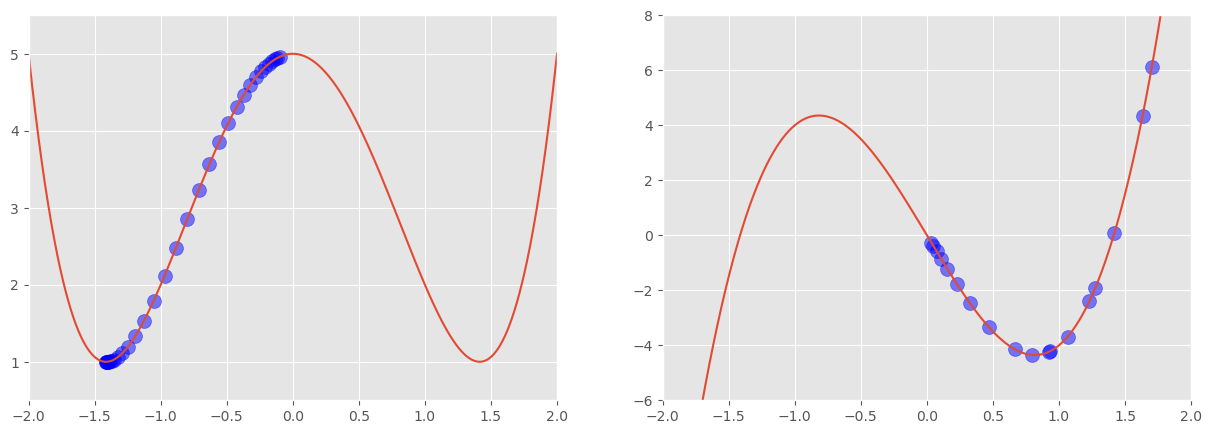

In [10]:
expected_x, slope_at_x, x_list, slope_list = gradient_descent(dg_dx, -0.1, 0.02, 0.001)
print(expected_x, slope_at_x)

# Plot functions 
plt.figure(figsize=[15, 5])

# Graph 1: x vs g(x)
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.plot(x, g(x))
plt.scatter(x_list, g(np.array(x_list)), s=100, color='blue', alpha=0.5)

# Graph 2: x vs g'(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x, dg_dx(x))
plt.scatter(slope_list, dg_dx(np.array(slope_list)), s=100, color='blue', alpha=0.5)

plt.show()

## Divergence, Overflow and Python Tuples
- There may occur curves or specific values on the curve for which our gradient descent algorithm diverges and runs into an overflow exception/error
- Another yet similar case occurrs when we start with the initial guess of 0 in above curve
- Below we can see overflow exception for initial guess at the leftmost part of the curve

$$h(x) = x^5 - 2x^4 + 2$$
$$h'(x) = 5x^4 - 8x^3$$

In [11]:
# Prepare data
x = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x ** 5 - 2 * x ** 4 + 2

def dh_dx(x):
    return 5 * x ** 4 - 8 * x ** 3

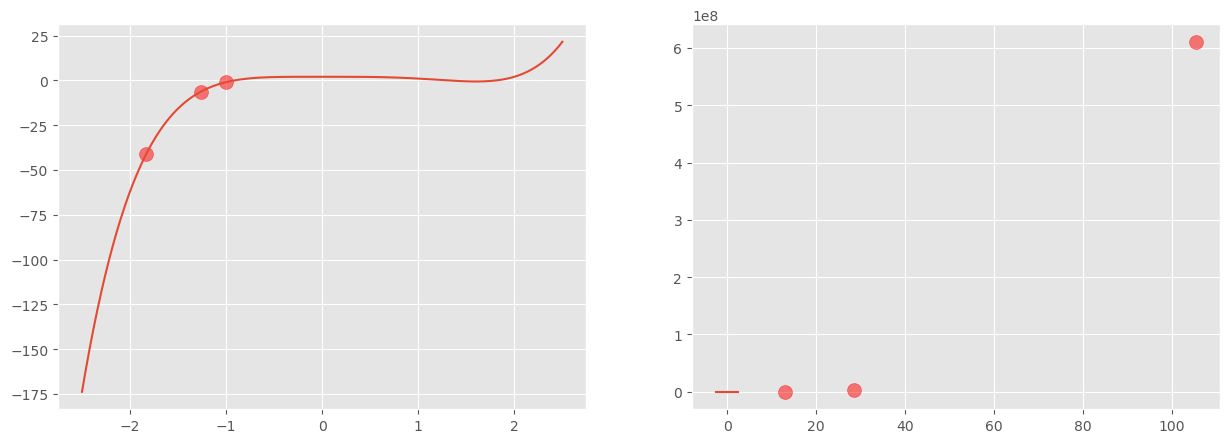

In [12]:
expected_x, slope_at_x, x_list, slope_list = gradient_descent(dh_dx, -1, 0.02, 0.001, 2)
plt.figure(figsize=[15, 5])

# Graph 1: x vs h(x) with superimposed gradient descent algorithm
plt.subplot(1, 2, 1)
plt.plot(x, h(x))
plt.scatter(x_list, h(np.array(x_list)), s=100, color='red', alpha=0.5)

# Graph 2: x vs h'(x) with superimposed gradient descent algorithm
plt.subplot(1, 2, 2)
plt.plot(x, dh_dx(x))
plt.scatter(slope_list, dh_dx(np.array(slope_list)), s=100, color='red', alpha=0.5)

plt.show()